In [9]:
%matplotlib inline 
from astroquery.mast import Observations
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#This combo for sure works
#star = EPIC 201833600
#observer = k2
#For that, you will "want" dataProducts['description'] == "Lightcurve Long Cadence (KLC) - C01"
#(Will comment lower down)
star = "EPIC 201497682" # input("What star would you like to look at?")
observer = "hlsp_everest" #input("Whose data do you want?")

In [13]:
obsCount = Observations.query_criteria_count(obs_collection = "K2",
                                             dataproduct_type = ["timeseries"],
                                             instrument_name = "Kepler",
                                             objectname = star,
                                             project = observer  
                                             )
print("Number of Observations: %i" % obsCount)


Number of Observations: 17


In [15]:
obsTable = Observations.query_criteria(obs_collection = "K2",
                                             dataproduct_type = ["timeseries"],
                                             instrument_name = "Kepler",
                                             objectname = star,
                                             project = observer   
                                             )
obsTable[0:5]['obsid','proposal_id','obs_id']

obsid,proposal_id,obs_id
str10,str34,str23
9600004204,GO1059,everest201491499-c01_lc
9600021778,GO1007_GO1048,everest201502195-c01_lc
9600023148,GO1036_GO1053_GO1059,everest201488486-c01_lc
9600004213,GO1059,everest201497682-c01_lc
9600008739,GO1054,everest201496678-c01_lc


In [17]:
dataProducts = Observations.get_product_list(obsTable[0:6])
dataProducts.colnames

['obsID',
 'obs_collection',
 'dataproduct_type',
 'obs_id',
 'description',
 'type',
 'dataURI',
 'productType',
 'productGroupDescription',
 'productSubGroupDescription',
 'productDocumentationURL',
 'project',
 'prvversion',
 'proposal_id',
 'productFilename',
 'size',
 'parent_obsid']

In [19]:
dataProducts['obsID', 'productFilename', 'description']

obsID,productFilename,description
str10,str58,str23
9600023148,hlsp_everest_k2_llc_201488486-c01_kepler_v2.0_dvs.pdf,Data validation summary
9600023148,hlsp_everest_k2_llc_201488486-c01_kepler_v2.0_dvs-prev.png,Preview-Full
9600023148,hlsp_everest_k2_llc_201488486-c01_kepler_v2.0_lc.fits,Detrended light curve
9600002707,hlsp_everest_k2_llc_201491139-c01_kepler_v2.0_dvs.pdf,Data validation summary
9600002707,hlsp_everest_k2_llc_201491139-c01_kepler_v2.0_dvs-prev.png,Preview-Full
9600002707,hlsp_everest_k2_llc_201491139-c01_kepler_v2.0_lc.fits,Detrended light curve
9600004204,hlsp_everest_k2_llc_201491499-c01_kepler_v2.0_dvs.pdf,Data validation summary
9600004204,hlsp_everest_k2_llc_201491499-c01_kepler_v2.0_dvs-prev.png,Preview-Full
9600004204,hlsp_everest_k2_llc_201491499-c01_kepler_v2.0_lc.fits,Detrended light curve


In [21]:
#HERE is that want statement
#It changes from star to star, observer to observer
want = ["lightcurve" in x or "light curve" in x for x in map(str.lower, dataProducts['description'])]
print(dataProducts[want])

  obsID    obs_collection dataproduct_type ...   size   parent_obsid
---------- -------------- ---------------- ... -------- ------------
9600023148             K2       timeseries ... 15359040   9600023148
9600002707             K2       timeseries ... 15287040   9600002707
9600004204             K2       timeseries ... 15361920   9600004204
9600008739             K2       timeseries ... 15436800   9600008739
9600004213             K2       timeseries ... 15390720   9600004213
9600021778             K2       timeseries ... 15295680   9600021778


In [23]:
manifest = Observations.download_products(dataProducts[want])
print(manifest)

INFO: Found cached file ./mastDownload/K2/everest201488486-c01_lc/hlsp_everest_k2_llc_201488486-c01_kepler_v2.0_lc.fits with expected size 15359040. [astroquery.query]
INFO: Found cached file ./mastDownload/K2/everest201491139-c01_lc/hlsp_everest_k2_llc_201491139-c01_kepler_v2.0_lc.fits with expected size 15287040. [astroquery.query]
INFO: Found cached file ./mastDownload/K2/everest201491499-c01_lc/hlsp_everest_k2_llc_201491499-c01_kepler_v2.0_lc.fits with expected size 15361920. [astroquery.query]
INFO: Found cached file ./mastDownload/K2/everest201496678-c01_lc/hlsp_everest_k2_llc_201496678-c01_kepler_v2.0_lc.fits with expected size 15436800. [astroquery.query]
INFO: Found cached file ./mastDownload/K2/everest201497682-c01_lc/hlsp_everest_k2_llc_201497682-c01_kepler_v2.0_lc.fits with expected size 15390720. [astroquery.query]
INFO: Found cached file ./mastDownload/K2/everest201502195-c01_lc/hlsp_everest_k2_llc_201502195-c01_kepler_v2.0_lc.fits with expected size 15295680. [astroquery

In [25]:
lchdu = fits.open(manifest['Local Path'][0])
fits.info(manifest['Local Path'][0])
#fits.getheader(manifest['Local Path'][0],ext=2)

Filename: ./mastDownload/K2/everest201488486-c01_lc/hlsp_everest_k2_llc_201488486-c01_kepler_v2.0_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  ARRAYS        1 BinTableHDU    319   4022R x 14C   [D, D, D, D, J, D, D, D, D, D, D, D, D, D]   
  2  PIXELS        1 BinTableHDU     19   4022R x 2C   [40D, 416D]   
  3  APERTURE MASK    1 ImageHDU        54   (16, 15)   int64   
  4  POSTAGE STAMPS    1 BinTableHDU     61   15R x 3C   [16D, 16D, 16D]   
  5  HI RES IMAGE    1 ImageHDU        54   (160, 150)   float64   


In [27]:
#Open and view columns in lightcurve extension
lcdata = lchdu[1].data
if observer == "k2":
    uncor_flux = lcdata['SAP_FLUX']
    cor_flux = lcdata['PDCSAP_FLUX']
    quality = lcdata['SAP_QUALITY']
    time = lcdata['TIME']
elif observer == "hlsp_everest":
    uncor_flux = lcdata['FRAW']
    cor_flux = lcdata['FLUX']
    quality = lcdata['QUALITY']
    time = lcdata['TIME']
elif observer == "hlsp_k2sff":
    uncor_flux = lcdata['FRAW']
    cor_flux = lcdata['FCOR']
    quality = lcdata['QUALITY']
    time = lcdata['T']

In [29]:
print(lchdu[1].columns)
print("This is SAP_FLUX:" + str(uncor_flux))
print("This is PDCSAP_FLUX:" + str(cor_flux))

ColDefs(
    name = 'CADN'; format = 'D'
    name = 'FLUX'; format = 'D'; unit = 'e-/s'
    name = 'FRAW'; format = 'D'; unit = 'e-/s'
    name = 'FRAW_ERR'; format = 'D'; unit = 'e-/s'
    name = 'QUALITY'; format = 'J'
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'
    name = 'FCOR'; format = 'D'; unit = 'e-/s'
    name = 'CBV01'; format = 'D'
    name = 'CBV02'; format = 'D'
    name = 'CBV03'; format = 'D'
    name = 'CBV04'; format = 'D'
    name = 'CBV05'; format = 'D'
    name = 'CBV06'; format = 'D'
    name = 'BKG'; format = 'D'; unit = 'e-/s'
)
This is SAP_FLUX:[7728.08204651 7711.87802124 7718.97348022 ... 8459.09411621 8459.16918945
 8459.91601562]
This is PDCSAP_FLUX:[3261.80433477 3239.50388011 3249.97397497 ... 8429.50632891 8429.83042809
 8425.49575689]


(8200, 8600)

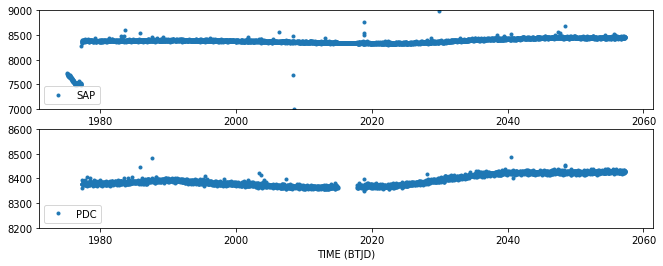

In [36]:
sapflux = uncor_flux
pdcflux = cor_flux
time = lcdata['TIME']

fig = plt.figure(figsize = (11,4))

#Changing the y-axis affects what you can see
#It changes from star to star, again.
#Is there a way to universalize this?
fig.add_subplot(211)
plt.plot(time, sapflux,'.', label = 'SAP')
plt.legend(loc = 'lower left')
#plt.ylim(np.amin(sapflux[~np.isnan(sapflux)])-1000,np.amax(sapflux[~np.isnan(sapflux)])+1000)  #Zoom in
plt.ylim(7000,9000)

fig.add_subplot(212)
plt.plot(time, pdcflux,'.', label = 'PDC')
plt.legend(loc = 'lower left')
plt.xlabel('TIME (BTJD)')
#plt.ylim(np.amin(pdcflux[~np.isnan(pdcflux)])-1000,np.amax(pdcflux[~np.isnan(pdcflux)])+1000)
plt.ylim(8200,8600)

In [31]:
bad_bits = np.array([1,2,3,4,5,6,8,10,12])
value = 0
for v in bad_bits:
    value = value + 2**(v-1)
    
bad_data = np.bitwise_and(quality, value) >= 1 
print(bad_data[0:5])

[ True  True  True  True  True]


Text(0.5, 0, 'TIME (BTJD)')

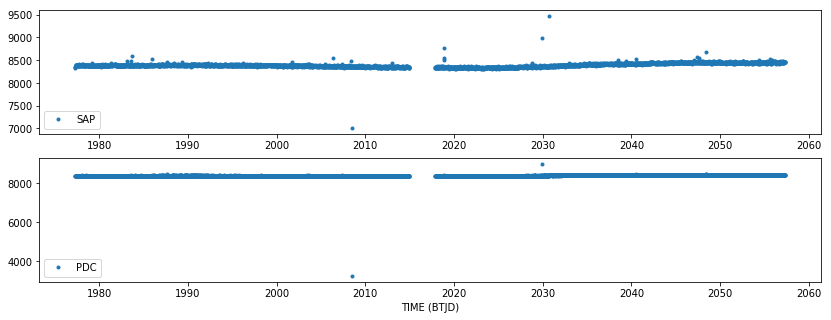

In [32]:
#Same plot as before with flagged data removed.
fig = plt.figure(figsize = (14,5))
fig.add_subplot(211)
plt.plot(time[~bad_data], sapflux[~bad_data], '.', label = 'SAP')
plt.legend(loc = 'lower left')

fig.add_subplot(212)
plt.plot(time[~bad_data], pdcflux[~bad_data], '.', label = 'PDC')
plt.legend(loc = 'lower left')
plt.xlabel('TIME (BTJD)')

In [33]:
'''
fluxcent_col = lcdata['MOM_CENTR1']
fluxcent_row = lcdata['MOM_CENTR2']
distance = ((fluxcent_col-np.nanmean(fluxcent_col))**2 + (fluxcent_row-np.nanmean(fluxcent_row))**2)**(0.5)

mom_dump = np.bitwise_and(quality, 2**5) >= 1 

plt.figure(figsize = (11,5))
plt.plot(time[~bad_data], distance[~bad_data], '.', label = "mom_centr distance")
plt.vlines(time[mom_dump], 0,.1, colors = 'r', label = "Momentum Dump")
plt.xlabel('TIME(BTKD)')
plt.legend(loc = "upper left")
'''

'\nfluxcent_col = lcdata[\'MOM_CENTR1\']\nfluxcent_row = lcdata[\'MOM_CENTR2\']\ndistance = ((fluxcent_col-np.nanmean(fluxcent_col))**2 + (fluxcent_row-np.nanmean(fluxcent_row))**2)**(0.5)\n\nmom_dump = np.bitwise_and(quality, 2**5) >= 1 \n\nplt.figure(figsize = (11,5))\nplt.plot(time[~bad_data], distance[~bad_data], \'.\', label = "mom_centr distance")\nplt.vlines(time[mom_dump], 0,.1, colors = \'r\', label = "Momentum Dump")\nplt.xlabel(\'TIME(BTKD)\')\nplt.legend(loc = "upper left")\n'

In [34]:
lchdu.close()